# 0- imports

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import random
import networkx as nx

# 1- generate random network 
##    1-1- with poisson distribution

### 1-1-1- initial varibles

In [2]:
class RandomNetworkPoisson:
    def __init__(self, numberOfNode):
        self.ourNet=nx.gnm_random_graph(numberOfNode, 2.3*sum(np.random.poisson(1, size=numberOfNode)))
        self.numberOfNode = numberOfNode
        self.wpr=[0]*self.numberOfNode
        self.data = [[0]*self.numberOfNode for _ in range(self.numberOfNode)]
        self.inComing=[]
        self.currentQueue = [0]*self.numberOfNode
        self.totalQueue = [100]*self.numberOfNode
        self.vulnerabilityCascade = [1]*self.numberOfNode
        for i in range (0, self.numberOfNode):
            self.inComing.append(list(self.ourNet.degree)[i][1])
        for i in range (0, self.numberOfNode):
            for f in range(0,self.numberOfNode):
                if self.ourNet.has_edge(i,f):
                    self.data[i][f]=1

### 1-1-2- generate

In [3]:
ER1 = RandomNetworkPoisson(100)
ER2 = RandomNetworkPoisson(100)

### 1-1-3- plotting degree Frequency

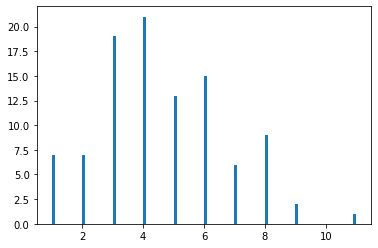

In [4]:
plt.hist(ER1.inComing, 100)
plt.show()

##    1-2- with Exponential distribution

### 1-2-1- initial varibles

In [5]:
class RandomNetworkExponential:
    def __init__(self, numberOfNode):
        self.numberOfNode = numberOfNode
        self.data = [[0]*self.numberOfNode for _ in range(self.numberOfNode)]
        self.inComing=np.random.exponential(1, size=self.numberOfNode)
        self.currentQueue = [0]*self.numberOfNode
        self.totalQueue = [100]*self.numberOfNode
        self.wpr=[0]*self.numberOfNode
        for i in range (0, self.numberOfNode):
            my_list = np.arange(0,self.numberOfNode).tolist()
            my_list.remove(i)                        
            random.shuffle(my_list)
            my_list2=my_list[0:self.inComing[i]]
            for f in range(0,self.numberOfNode):
                if f in my_list2:
                    self.data[i][f]=1
        self.outComing=[0]*self.numberOfNode
        for i in range (0, self.numberOfNode):
            for j in range (0, self.numberOfNode):
                if self.data[i][j]==1:
                    self.outComing[i]=self.outComing[i]+1

### 1-2-2- generate

In [6]:
# ER3 = RandomNetworkExponential(2500)
# ER4 = RandomNetworkExponential(2500)

### 1-2-3- plotting degree Frequency

In [7]:
# plt.hist(ER3.inComing, 200)
# plt.show()

# 2- generate scale free network

## 2-1- initial varibles

In [8]:
class ScaleFreeNetwork:
    def __init__(self, numberOfNode):
        self.numberOfNode = numberOfNode
        self.data = [[0]*self.numberOfNode for _ in range(self.numberOfNode)]
        self.inComing = [0]*self.numberOfNode
        self.currentQueue = [0]*self.numberOfNode
        self.totalQueue = [100]*self.numberOfNode
        self.wpr=[0]*self.numberOfNode
        my_list_scale = np.arange(0,self.numberOfNode).tolist()    
        random.shuffle(my_list_scale)
        for i in range (0, len(my_list_scale)):
            self.inComing[my_list_scale[i]]=11-int(math.log(i+1,2))
            if i>=2047:
                self.inComing[my_list_scale[i]]=1
        for i in range (0, self.numberOfNode):
            my_list = np.arange(0,self.numberOfNode).tolist()
            my_list.remove(i)                        
            random.shuffle(my_list)
            my_list2=my_list[0:self.inComing[i]]
            for f in range(0,self.numberOfNode):
                if f in my_list2:
                    self.data[i][f]=1
        self.outComing=[0]*self.numberOfNode
        for i in range (0, self.numberOfNode):
            for j in range (0, self.numberOfNode):
                if self.data[i][j]==1:
                    self.outComing[i]=self.outComing[i]+1

### 2-2- generate

In [9]:
SF1 = ScaleFreeNetwork(500)
SF2 = ScaleFreeNetwork(500)

## 2-3- plotting degree Frequency

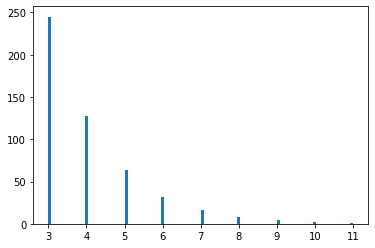

In [10]:
plt.hist(SF1.inComing, 100)
plt.show()

# 3- mixing networks for making interdent network

## 3-1- define params

In [11]:
couplingStrength=1.0

## 3-2- generate

In [12]:
class InterdependentNetwork:
    def __init__(self,networkA,networkB,couplingStrength):
        self.couplingStrength = couplingStrength
        self.networkA = networkA
        self.networkB = networkB
        self.neighborA = np.arange(0,self.networkA.numberOfNode).tolist()              
        random.shuffle(self.neighborA)
        self.neighborB = np.arange(0,self.networkB.numberOfNode).tolist()              
        random.shuffle(self.neighborB)
        self.numberOfneighbor=int(self.couplingStrength*self.networkB.numberOfNode)
        self.neighborA=self.neighborA[0:self.numberOfneighbor]
        self.neighborB=self.neighborB[0:self.numberOfneighbor]

In [13]:
ER_ER_Network=InterdependentNetwork(ER1,ER2,couplingStrength)

# 4- starting algorithm

## 4-1- define params

In [14]:
R=[1,5,10,50]
numberOfdays=20

In [15]:
def sizeOfG(ER_ER_Network,failsNodesA,failsNodesB):
    visitedA = [0]*ER_ER_Network.networkA.numberOfNode
    visitedB = [0]*ER_ER_Network.networkB.numberOfNode
    
    stackOfDfsIndex=[]
    stackOfDfsType=[]
    SizeOfMaxComponent=0;
    while 0 in visitedA or 0 in visitedB:
        SizeOfCurrentComponent=0;
        if 0 in visitedA:
            stackOfDfsIndex.append(visitedA.index(0)) 
            stackOfDfsType.append('A')
        else:
            stackOfDfsIndex.append(visitedB.index(0)) 
            stackOfDfsType.append('B') 
        while len(stackOfDfsIndex)>0:
            currentNode=stackOfDfsIndex.pop()
            currentType=stackOfDfsType.pop()
            if currentType=='A' and (visitedA[currentNode]==1 or currentNode in failsNodesA):
                visitedA[currentNode]=1
                continue
            if currentType=='B' and (visitedB[currentNode]==1 or currentNode in failsNodesB):
                visitedB[currentNode]=1
                continue
            SizeOfCurrentComponent += 1
            if SizeOfCurrentComponent > SizeOfMaxComponent:
                SizeOfMaxComponent = SizeOfCurrentComponent
                
            if currentType=='A':
                visitedA[currentNode]=1
                indices = [i for i, x in enumerate(ER_ER_Network.networkA.data[currentNode]) if x == 1]
                stackOfDfsIndex.extend(indices)
                stackOfDfsType.extend(['A']*len(indices))
                if currentNode in ER_ER_Network.neighborA:
                    stackOfDfsIndex.append(ER_ER_Network.neighborB[ER_ER_Network.neighborA.index(currentNode)])
                    stackOfDfsType.append('B')
            if currentType=='B':
                visitedB[currentNode]=1
                indices = [i for i, x in enumerate(ER_ER_Network.networkB.data[currentNode]) if x == 1]
                stackOfDfsIndex.extend(indices)
                stackOfDfsType.extend(['B']*len(indices))
                if currentNode in ER_ER_Network.neighborB:
                    stackOfDfsIndex.append(ER_ER_Network.neighborA[ER_ER_Network.neighborB.index(currentNode)])
                    stackOfDfsType.append('A')
    return SizeOfMaxComponent/(ER_ER_Network.networkB.numberOfNode + ER_ER_Network.networkA.numberOfNode)

In [16]:
def distrubuteQueue(network,nodeIndex,failsNodes):
    indices = [i for i, x in enumerate(network.data[nodeIndex]) if x == 1]
    notFailcounter=0
    for i in range(0,len(indices)):
        if indices[i] not in failsNodes:
            notFailcounter += network.vulnerabilityCascade[indices[i]]
            
    for i in range(0,len(indices)):
        if indices[i] not in failsNodes:  
            network.currentQueue[indices[i]] += (network.currentQueue[nodeIndex]/notFailcounter)*network.vulnerabilityCascade[indices[i]]

In [17]:
def findingCentrality(network,numberOfCentrality,failsNodesA,failsNodeB):
    numberOfOut=[]
    for nodeIndex in range(0,network.networkA.numberOfNode):
        numberOfOut.append(len([i for i, x in enumerate(network.networkA.data[nodeIndex]) if x == 1]))
    for nodeIndex in range(0,network.networkB.numberOfNode):
        numberOfOut.append(len([i for i, x in enumerate(network.networkB.data[nodeIndex]) if x == 1]))
    sortedNumberOfOut=list(np.argsort(numberOfOut))
    sortedNumberOfOut.reverse()
    return sortedNumberOfOut[0:numberOfCentrality]

In [18]:
def startCascadingFailure(network,R,failsNodesA,failsNodesB):
    print('start of cascading {}  {}'.format(len(failsNodesA),len(failsNodesB)))
    listOfCentalityNode=findingCentrality(network,R,failsNodesA,failsNodesB)
    for i in range(0,len(listOfCentalityNode)):
        if listOfCentalityNode[i] < network.networkA.numberOfNode:
            network.networkA.currentQueue[listOfCentalityNode[i]]=0
            failsNodesA=list(filter(lambda a: a != listOfCentalityNode[i], failsNodesA))
            if listOfCentalityNode[i] in ER_ER_Network.neighborA:
                failsNodesB=list(filter(lambda a: a != ER_ER_Network.neighborB[ER_ER_Network.neighborA.index(listOfCentalityNode[i])], failsNodesB))
        else:
            network.networkB.currentQueue[listOfCentalityNode[i]-network.networkA.numberOfNode]=0
            failsNodesB=list(filter(lambda a: a != listOfCentalityNode[i]-network.networkA.numberOfNode, failsNodesB))
            if listOfCentalityNode[i]-network.networkA.numberOfNode in ER_ER_Network.neighborB:
                failsNodesA=list(filter(lambda a: a != ER_ER_Network.neighborA[ER_ER_Network.neighborB.index(listOfCentalityNode[i]-network.networkA.numberOfNode)], failsNodesA))
    print('end of cascading {}  {}'.format(len(failsNodesA),len(failsNodesB)))
    return [failsNodesA,failsNodesB]

In [19]:
def newWattValue(network,nodeIndex):
    numberOfNeighbers=len([i for i, x in enumerate(network.data[nodeIndex]) if x == 1])
    return 65 + numberOfNeighbers

In [20]:
def freeStorage(network,nodeIndex):
    numberOfNeighbers=len([i for i, x in enumerate(network.data[nodeIndex]) if x == 1])
    return 100-(newWattValue(network,nodeIndex))

In [21]:
def neighbors(network,nodeIndex):
    indices = [i for i, x in enumerate(network.data[nodeIndex]) if x == 1]
    return indices

In [24]:
def calculateVulnerability(network):
    layer=3
    for nodeIndex in range(0,network.networkA.numberOfNode):
        network.networkA.vulnerabilityCascade[nodeIndex] = freeStorage(network.networkA,nodeIndex)
    vulnerabilityCascadeTempA = [0]*network.networkA.numberOfNode
    vulnerabilityCascadeTempB = [0]*network.networkB.numberOfNode
    for i in range(0,layer):
        for nodeIndex in range(0,network.networkA.numberOfNode):
            neighborIndexis=neighbors(network.networkA,nodeIndex)
            sum=0
            for neighborIndex in range(0,len(neighborIndexis)):
                sum+=network.networkA.vulnerabilityCascade[neighborIndex]
            vulnerabilityCascadeTempA[nodeIndex]=sum
        for nodeIndex in range(0,network.networkB.numberOfNode):
            neighborIndexis=neighbors(network.networkB,nodeIndex)
            sum=0
            for neighborIndex in range(0,len(neighborIndexis)):
                sum+=network.networkB.vulnerabilityCascade[neighborIndex]
            vulnerabilityCascadeTempB[nodeIndex]=sum
        network.networkA.vulnerabilityCascade=vulnerabilityCascadeTempA
        network.networkB.vulnerabilityCascade=vulnerabilityCascadeTempB
    return [network.networkA.vulnerabilityCascade,network.networkB.vulnerabilityCascade]

## 4-2- define centrality like zhong et al.

In [26]:
sizeOfGInEachDayRestoration=[[0]*numberOfdays for _ in range(len(R))]
[ER_ER_Network.networkA.vulnerabilityCascade,ER_ER_Network.networkB.vulnerabilityCascade]=calculateVulnerability(ER_ER_Network)
for rIndex in range(0, len(R)):
    for restorationDay in range (0, numberOfdays):
        failsNodesA=[]
        failsNodesB=[]
        ER_ER_Network.networkA.currentQueue=[0]*ER_ER_Network.networkA.numberOfNode
        ER_ER_Network.networkB.currentQueue=[0]*ER_ER_Network.networkB.numberOfNode
        

        numberOfNodeFailedForTest = 20
        centrallist=findingCentrality(ER_ER_Network,numberOfNodeFailedForTest,failsNodesA,failsNodesB)
        for i in range(0,numberOfNodeFailedForTest):
            if centrallist[i] < ER_ER_Network.networkA.numberOfNode:
                ER_ER_Network.networkA.currentQueue[centrallist[i]]+=2*ER_ER_Network.networkA.totalQueue[centrallist[i]]
            else:
                ER_ER_Network.networkB.currentQueue[centrallist[i]-ER_ER_Network.networkA.numberOfNode]+=2*ER_ER_Network.networkB.totalQueue[centrallist[i]-ER_ER_Network.networkA.numberOfNode]
         
        
        for dayIndex in range (1, numberOfdays):
            if dayIndex == restorationDay:
                startCascadingFailure(ER_ER_Network,R[rIndex],failsNodesA,failsNodesB)
        
            for nodeIndex in range (0, ER_ER_Network.networkA.numberOfNode): 
                ER_ER_Network.networkA.currentQueue[nodeIndex]+=newWattValue(ER_ER_Network.networkA,nodeIndex)
                if ER_ER_Network.networkA.currentQueue[nodeIndex]<100:
                    ER_ER_Network.networkA.currentQueue[nodeIndex]=0
                else:
                    ER_ER_Network.networkA.currentQueue[nodeIndex]-=100
                    if nodeIndex not in failsNodesA:
                        failsNodesA.append(nodeIndex)
                        distrubuteQueue(ER_ER_Network.networkA,nodeIndex,failsNodesA)
                        if nodeIndex in ER_ER_Network.neighborA:
                            failsNodesB.append(ER_ER_Network.neighborB[ER_ER_Network.neighborA.index(nodeIndex)])
                            distrubuteQueue(ER_ER_Network.networkB,ER_ER_Network.neighborB[ER_ER_Network.neighborA.index(nodeIndex)],failsNodesB)


            for nodeIndex in range (0, ER_ER_Network.networkB.numberOfNode): 
                ER_ER_Network.networkB.currentQueue[nodeIndex]+=newWattValue(ER_ER_Network.networkB,nodeIndex)
                if ER_ER_Network.networkB.currentQueue[nodeIndex]<100:
                    ER_ER_Network.networkB.currentQueue[nodeIndex]=0
                else:
                    ER_ER_Network.networkB.currentQueue[nodeIndex]-=100
                    if nodeIndex not in failsNodesB:
                        failsNodesB.append(nodeIndex)
                        distrubuteQueue(ER_ER_Network.networkB,nodeIndex,failsNodesB)
                        if nodeIndex in ER_ER_Network.neighborB:
                            failsNodesA.append(ER_ER_Network.neighborA[ER_ER_Network.neighborB.index(nodeIndex)])
                            distrubuteQueue(ER_ER_Network.networkA,ER_ER_Network.neighborA[ER_ER_Network.neighborB.index(nodeIndex)],failsNodesA)
           
        sizeOfGInEachDayRestoration[rIndex][restorationDay] = sizeOfG(ER_ER_Network,failsNodesA,failsNodesB)
        print('R={} t={} and G = {}  '.format(R[rIndex],restorationDay,sizeOfGInEachDayRestoration[rIndex][restorationDay]))
    print('---------------------------------------')

R=1 t=0 and G = 0.04  
start of cascading 0  0
end of cascading 0  0
R=1 t=1 and G = 0.08  
start of cascading 37  37
end of cascading 36  36
R=1 t=2 and G = 0.04  
start of cascading 67  67
end of cascading 66  66
R=1 t=3 and G = 0.04  
start of cascading 78  78
end of cascading 77  77
R=1 t=4 and G = 0.04  
start of cascading 79  79
end of cascading 78  78
R=1 t=5 and G = 0.04  
start of cascading 83  83
end of cascading 82  82
R=1 t=6 and G = 0.04  
start of cascading 83  83
end of cascading 82  82
R=1 t=7 and G = 0.04  
start of cascading 83  83
end of cascading 82  82
R=1 t=8 and G = 0.04  
start of cascading 83  83
end of cascading 82  82
R=1 t=9 and G = 0.04  
start of cascading 83  83
end of cascading 82  82
R=1 t=10 and G = 0.04  
start of cascading 83  83
end of cascading 82  82
R=1 t=11 and G = 0.04  
start of cascading 83  83
end of cascading 82  82
R=1 t=12 and G = 0.04  
start of cascading 83  83
end of cascading 82  82
R=1 t=13 and G = 0.04  
start of cascading 83  83
en

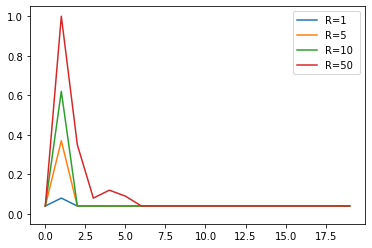

In [27]:
plt.ylim(top=1.05)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=-0.05)
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
for rIndex in range(0, len(R)):
    plt.plot(x,sizeOfGInEachDayRestoration[rIndex]) # plotting by columns
plt.gca().legend(('R={} '.format(R[0]),'R={} '.format(R[1]),'R={} '.format(R[2]),'R={} '.format(R[3])))
plt.show()

## 4-3- define centrality like shahpari et al.

### 4-3-1- algorithm

In [ ]:
d=0.85
wpr=[1] *ER_ER_Network.networkA.numberOfNode
wOut=[[0]*ER_ER_Network.networkA.numberOfNode for _ in range(ER_ER_Network.networkA.numberOfNode)]
wIn=[[0]*ER_ER_Network.networkA.numberOfNode for _ in range(ER_ER_Network.networkA.numberOfNode)]
for j in range (0, ER_ER_Network.networkA.numberOfNode):
    for i in range (0, ER_ER_Network.networkA.numberOfNode):
        sumOfIncoming=0
        sumOfOutcoming=0
        indicesOutcome = [p for p, x in enumerate(ER_ER_Network.networkA.data[j]) if x == 1]
        for k in range(0,len(indicesOutcome)):
            sumOfIncoming+=ER_ER_Network.networkA.inComing[indicesOutcome[k]]
            sumOfOutcoming=sumOfOutcoming+ER_ER_Network.networkA.inComing[indicesOutcome[k]]
        wIn[j][i]=ER_ER_Network.networkA.inComing[i]/max(sumOfIncoming,1)
        wOut[j][i]=ER_ER_Network.networkA.inComing[i]/max(sumOfOutcoming,1)  

for i in range (0, ER_ER_Network.networkA.numberOfNode):
    sumOfwprs=0
    for j in range (0, ER_ER_Network.networkA.numberOfNode):
        if ER_ER_Network.networkA.data[j][i]==1:
            sumOfwprs=sumOfwprs+wpr[j]*wIn[j][i]*wOut[j][i]
    ER_ER_Network.networkA.wpr[i]=(1-d)+d*(sumOfwprs)    

In [ ]:
d=0.85
wpr=[1] *ER_ER_Network.networkB.numberOfNode
wOut=[[0]*ER_ER_Network.networkB.numberOfNode for _ in range(ER_ER_Network.networkB.numberOfNode)]
wIn=[[0]*ER_ER_Network.networkB.numberOfNode for _ in range(ER_ER_Network.networkB.numberOfNode)]
for j in range (0, ER_ER_Network.networkB.numberOfNode):
    for i in range (0, ER_ER_Network.networkB.numberOfNode):
        sumOfIncoming=0
        sumOfOutcoming=0
        indicesOutcome = [p for p, x in enumerate(ER_ER_Network.networkB.data[j]) if x == 1]
        for k in range(0,len(indicesOutcome)):
            sumOfIncoming+=ER_ER_Network.networkB.inComing[indicesOutcome[k]]
            sumOfOutcoming=sumOfOutcoming+ER_ER_Network.networkB.inComing[indicesOutcome[k]]
        wIn[j][i]=ER_ER_Network.networkB.inComing[i]/max(sumOfIncoming,1)
        wOut[j][i]=ER_ER_Network.networkB.inComing[i]/max(sumOfOutcoming,1)  

for i in range (0, ER_ER_Network.networkB.numberOfNode):
    sumOfwprs=0
    for j in range (0, ER_ER_Network.networkB.numberOfNode):
        if ER_ER_Network.networkB.data[j][i]==1:
            sumOfwprs=sumOfwprs+wpr[j]*wIn[j][i]*wOut[j][i]
    ER_ER_Network.networkB.wpr[i]=(1-d)+d*(sumOfwprs)

### 4-3-2- finding centrality

In [ ]:
def findingCentralityShahpari(network,numberOfCentrality,failsNodesA,failsNodeB):
    wprA=network.networkA.wpr
    wprB=network.networkB.wpr
    for i in range(0,len(wprA)):
        if i in failsNodesA:
            wprA[i]=-2
        if i in failsNodesB:
            wprB[i]=-2
    sortedwprA=list(np.argsort(wprA))
    sortedwprA.reverse()
    return sortedwprA[0:numberOfCentrality]

### 4-3-3- algorithm of casecade

In [ ]:
sizeOfGInEachDayRestoration=[[0]*numberOfdays for _ in range(len(R))]

for rIndex in range(0, len(R)):
    for restorationDay in range (0, numberOfdays):
        failsNodesA=[]
        failsNodesB=[]
        ER_ER_Network.networkA.currentQueue=[0]*ER_ER_Network.networkA.numberOfNode
        ER_ER_Network.networkB.currentQueue=[0]*ER_ER_Network.networkB.numberOfNode
        

        numberOfNodeFailedForTest = 20
        centrallist=findingCentralityShahpari(ER_ER_Network,numberOfNodeFailedForTest,failsNodesA,failsNodesB)
        for i in range(0,numberOfNodeFailedForTest):
            if centrallist[i] < ER_ER_Network.networkA.numberOfNode:
                ER_ER_Network.networkA.currentQueue[centrallist[i]]+=2*ER_ER_Network.networkA.totalQueue[centrallist[i]]
            else:
                ER_ER_Network.networkB.currentQueue[centrallist[i]-ER_ER_Network.networkA.numberOfNode]+=2*ER_ER_Network.networkB.totalQueue[centrallist[i]-ER_ER_Network.networkA.numberOfNode]
         
        
        for dayIndex in range (1, numberOfdays):
            if dayIndex == restorationDay:
                startCascadingFailure(ER_ER_Network,R[rIndex],failsNodesA,failsNodesB)
        
            for nodeIndex in range (0, ER_ER_Network.networkA.numberOfNode): 
                ER_ER_Network.networkA.currentQueue[nodeIndex]+=75
                if ER_ER_Network.networkA.currentQueue[nodeIndex]<100:
                    ER_ER_Network.networkA.currentQueue[nodeIndex]=0
                else:
                    ER_ER_Network.networkA.currentQueue[nodeIndex]-=100
                    if nodeIndex not in failsNodesA:
                        failsNodesA.append(nodeIndex)
                        distrubuteQueue(ER_ER_Network.networkA,nodeIndex,failsNodesA)
                        if nodeIndex in ER_ER_Network.neighborA:
                            failsNodesB.append(ER_ER_Network.neighborB[ER_ER_Network.neighborA.index(nodeIndex)])
                            distrubuteQueue(ER_ER_Network.networkB,ER_ER_Network.neighborB[ER_ER_Network.neighborA.index(nodeIndex)],failsNodesB)


            for nodeIndex in range (0, ER_ER_Network.networkB.numberOfNode): 
                ER_ER_Network.networkB.currentQueue[nodeIndex]+=75
                if ER_ER_Network.networkB.currentQueue[nodeIndex]<100:
                    ER_ER_Network.networkB.currentQueue[nodeIndex]=0
                else:
                    ER_ER_Network.networkB.currentQueue[nodeIndex]-=100
                    if nodeIndex not in failsNodesB:
                        failsNodesB.append(nodeIndex)
                        distrubuteQueue(ER_ER_Network.networkB,nodeIndex,failsNodesB)
                        if nodeIndex in ER_ER_Network.neighborB:
                            failsNodesA.append(ER_ER_Network.neighborA[ER_ER_Network.neighborB.index(nodeIndex)])
                            distrubuteQueue(ER_ER_Network.networkA,ER_ER_Network.neighborA[ER_ER_Network.neighborB.index(nodeIndex)],failsNodesA)
           
        sizeOfGInEachDayRestoration[rIndex][restorationDay] = sizeOfG(ER_ER_Network,failsNodesA,failsNodesB)
        print('R={} t={} and G = {}  '.format(R[rIndex],restorationDay,sizeOfGInEachDayRestoration[rIndex][restorationDay]))
    print('---------------------------------------')

In [ ]:
plt.ylim(top=1.05)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=-0.05)
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
for rIndex in range(0, len(R)):
    plt.plot(x,sizeOfGInEachDayRestoration[rIndex]) # plotting by columns
plt.gca().legend(('R={} '.format(R[0]),'R={} '.format(R[1]),'R={} '.format(R[2]),'R={} '.format(R[3])))
plt.show()

# 5- plotting resualt

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
G = nx.Graph()
G.add_nodes_from([9,2,9,8,9,0,6,5,5])
G.add_edges_from([(1,2),(0,2)])
nx.draw(G, with_labels=True) 
plt.show(nx)

In [ ]:
G

In [ ]:
gggggg=[1,8,9,4,6,7,9,0,2,3,4]

In [ ]:
g2g3=list(np.argsort(gggggg))

In [ ]:
g2g3

In [ ]:
def fff(B):
    B=[4,9,8,7,3]
    B=list(filter(lambda a: a != 8, B))
    return [B,B]
h=[7,8,2]
fff(h)
h=fff(h)
print(h[0])

In [ ]:
h[0]

In [ ]:
f=nx.gnm_random_graph(100, sum(np.random.poisson(1, size=100)))

In [ ]:
f.has_edge(70,70)

In [ ]:
nx.draw(f, with_labels=True) 
plt.show(nx)

In [ ]:
def fff(B):
    B=[5,6]
    c=[7,3]
    return [B,c]

B=[4,6]
d=[]
[B,d]=fff(B)
print(d)